In [ ]:
!pip install tensorflow_text==2.11.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 32.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 588.3/588.3 MB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 71.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 58.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 80.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.2/439.2 kB 39.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 85.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 53.8 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of tf-keras to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 79.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 78.9 MB/s eta 0:00:00
  Attempting uninstall: tf-keras
    Found existing in

In [ ]:
import pandas as pd

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
# We'll use nltk here, but there are other nlp packages available for this
import nltk
nltk.download('punkt')
nltk.download('stopwords')

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
train_set = 'https://github.com/KCL-Health-NLP/nlp_examples/blob/master/pubmed/train.txt?raw=true'
test_set = 'https://github.com/KCL-Health-NLP/nlp_examples/blob/master/pubmed/test.txt?raw=true'
dev_set = 'https://github.com/KCL-Health-NLP/nlp_examples/blob/master/pubmed/dev.txt?raw=true'


In [ ]:
train= pd.read_csv(train_set, sep='\t', header=None, names=['id', 'Label', 'Text'])
test = pd.read_csv(test_set, sep='\t', header=None, names=['id', 'Label', 'Text'])
dev = pd.read_csv(dev_set, sep='\t', header=None, names=['id', 'Label', 'Text'])

# Pre-processing

we want fair evaluation of our model when checking its performance, therefore, its important to ascertain if class distributions are consistent across the 3 sets. We notice here that they indeed are, with methods and results class dominating other classes across all the sets. However, there is class imbalance across all sets which can bias our predictions to the majority class.

Given computational and time constraints, we will implement under-sampling. this will have 2 advantages - we can test more permutations and combinations of models and embedding techniques given time constraints as well as curb computational constraints while mitigating class imbalance effects on model's predictions.



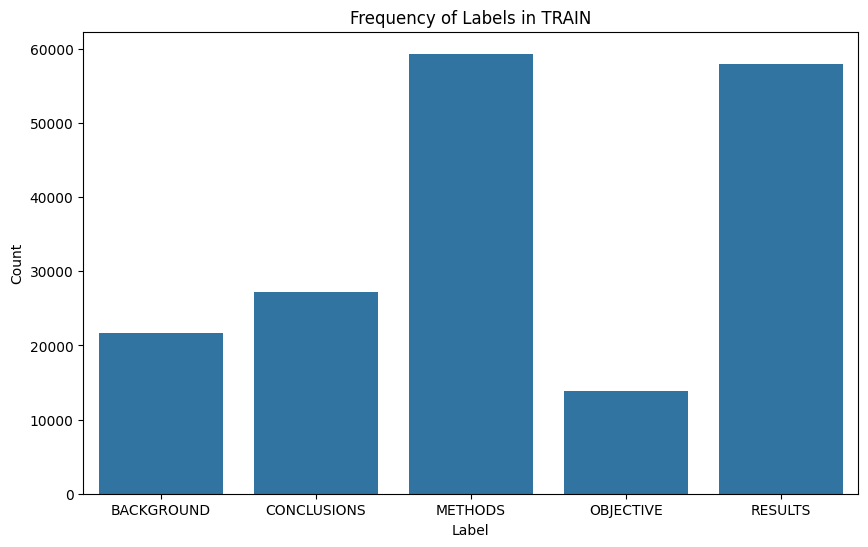

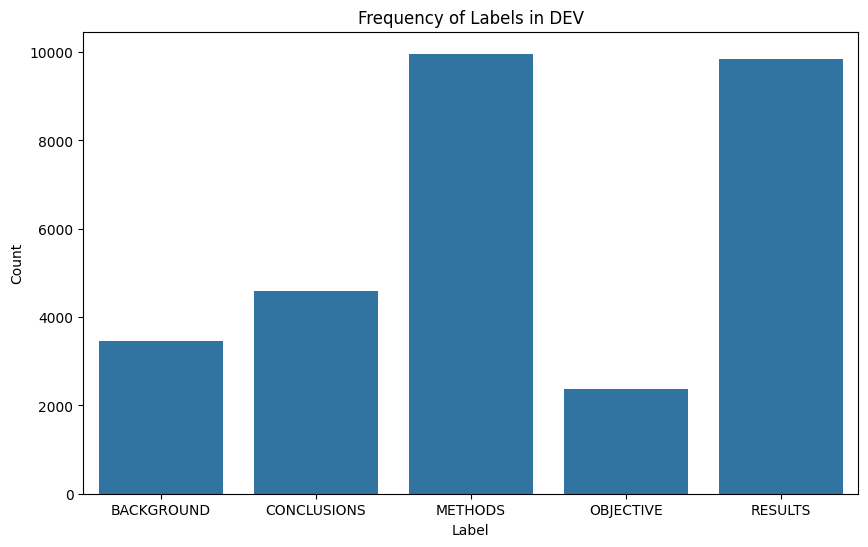

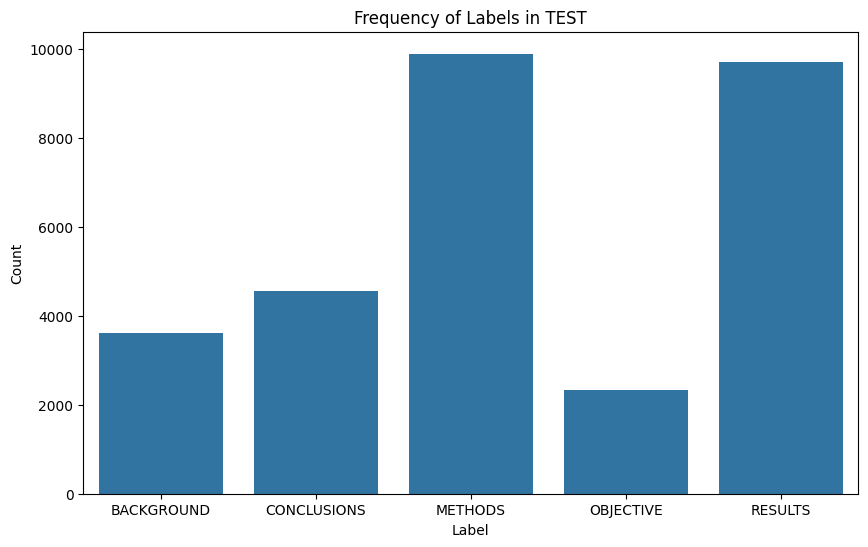

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Plotting the frequency of each label
unique_labels = sorted(train['Label'].unique())

plt.figure(figsize=(10, 6))
sns.countplot(x='Label', data=train, order=unique_labels)
plt.title('Frequency of Labels in TRAIN')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()


plt.figure(figsize=(10, 6))
sns.countplot(x='Label', data=dev,order=unique_labels)
plt.title('Frequency of Labels in DEV')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()


plt.figure(figsize=(10, 6))
sns.countplot(x='Label', data=test,order=unique_labels)
plt.title('Frequency of Labels in TEST')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

we will also add order to the dataset -- a potential feature that we can feed to our model for improved classification accuracy

In [ ]:
sets=[train, dev, test]

for df in sets:
  df['order']= df.groupby('id').cumcount() +1

Class distribution after undersampling:
Label
CONCLUSIONS    13839
BACKGROUND     13839
RESULTS        13839
METHODS        13839
OBJECTIVE      13839
Name: count, dtype: int64



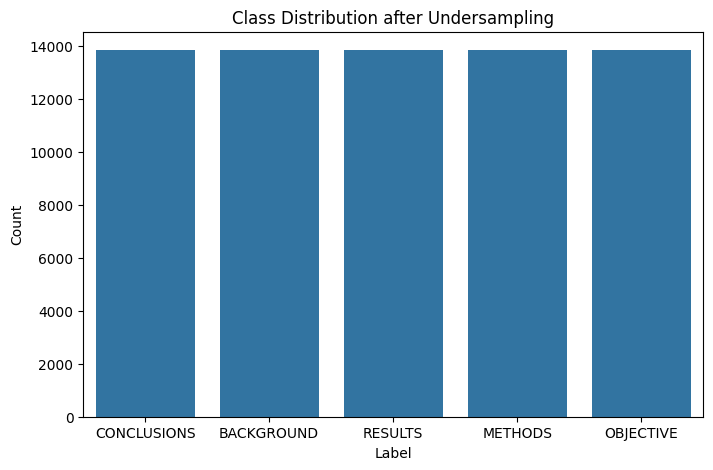

Class distribution after undersampling:
Label
BACKGROUND     2376
RESULTS        2376
METHODS        2376
OBJECTIVE      2376
CONCLUSIONS    2376
Name: count, dtype: int64



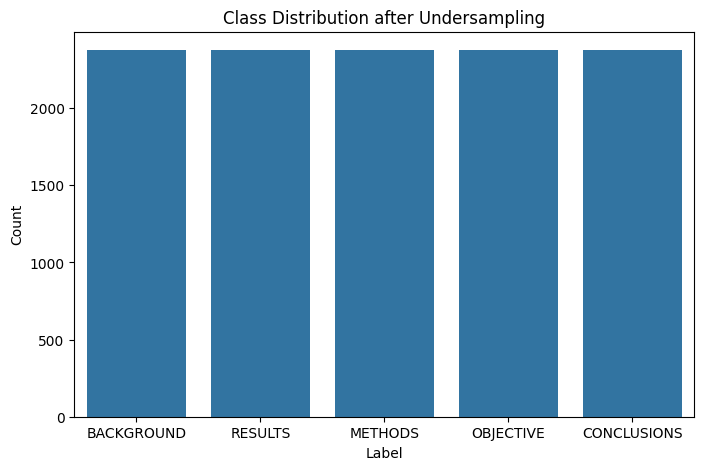

Class distribution after undersampling:
Label
METHODS        2333
OBJECTIVE      2333
BACKGROUND     2333
RESULTS        2333
CONCLUSIONS    2333
Name: count, dtype: int64



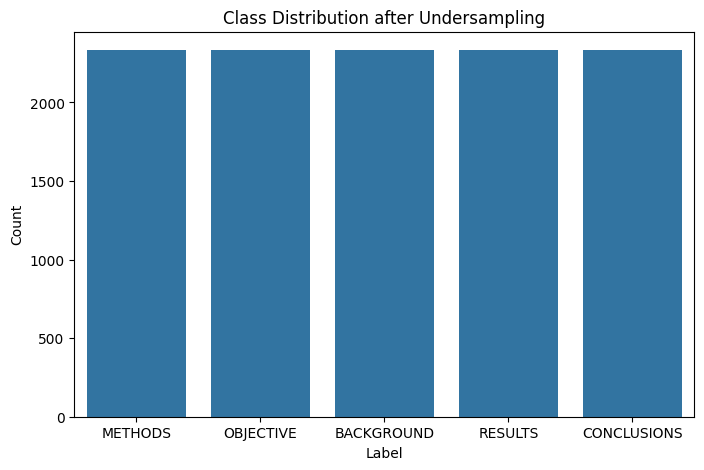

In [ ]:
sets=[train, dev, test]
df_names = ['train', 'dev', 'test']



minority_class='OBJECTIVE'

for df,names in zip(sets, df_names):

  minority_count=df['Label'].value_counts()[minority_class]
  class_count=df['Label'].value_counts()

  undersampled_dfs=[]
  for label, count in class_count.items():
    if label!=minority_class and count>minority_count:
      undersampled_df = df[df['Label'] == label].sample(minority_count, replace=False, random_state=42)
      undersampled_dfs.append(undersampled_df)

  undersampled_df = pd.concat([df[df['Label'] == minority_class]] + undersampled_dfs)
  undersampled_df = undersampled_df.sample(frac=1, random_state=42)
  undersampled_df.to_csv(f'undersampled_{names}.csv', index=False)
    # Display the class distribution after undersampling
  print("Class distribution after undersampling:")
  print(undersampled_df['Label'].value_counts())
  print()

    # Plot class distribution
  plt.figure(figsize=(8, 5))
  sns.countplot(x='Label', data=undersampled_df)
  plt.title('Class Distribution after Undersampling')
  plt.xlabel('Label')
  plt.ylabel('Count')
  plt.show()


I downloaded the undersampled data to save time.

In [ ]:
train=pd.read_csv('/content/undersampled_train.csv')
dev=pd.read_csv('/content/undersampled_dev.csv')
test=pd.read_csv('/content/undersampled_test.csv')

In [ ]:
print(train['Label'].value_counts())

Label
CONCLUSIONS    13839
BACKGROUND     13839
RESULTS        13839
METHODS        13839
OBJECTIVE      13839
Name: count, dtype: int64


In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk import pos_tag
nltk.download('averaged_perceptron_tagger')
import re
import spacy
nlp = spacy.load('en_core_web_sm')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

# Pre processing

In [ ]:
# Initialize NLTK resources
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()


In [ ]:
def preprocess(text):
  #lowercasing
  text = text.lower()

  #tokenise
  tokens=word_tokenize(text)

  #removing stopwords
  tokens = [token for token in tokens if token not in stop_words]

  #lemmatisation
  tokens =[lemmatizer.lemmatize(token) for token in tokens]
  #stemming
  #tokens = [stemmer.stem(token) for token in tokens]


  #pos_tags = pos_tag(tokens)

  #tokens = [token for token, _ in pos_tags]

  preprocessed_text = ' '.join(tokens)

  return preprocessed_text


#applying preprocessing to each text in the Text row in train
train['Text']= train['Text'].apply(preprocess)
print('almost there...')
test['Text']= test['Text'].apply(preprocess)
print('hang in tight!')
dev['Text']= dev['Text'].apply(preprocess)
print('phew that took forever')



almost there...
hang in tight!
phew that took forever


In [ ]:
import string

#mostly mentioned in methods
def tag_measurements(text):
  pattern = r'\b\d+(\.\d+)?\s*(mg|kg|g|ml|l|cm|mm|m)\b'
  #tagged_text = re.sub(pattern, r' <MEASUREMENT>\g<0>/</MEASUREMENT> ', text)
  tagged_text = re.sub(pattern, r' MEASUREMENT ', text)
  return tagged_text

'''
def remove_verbs(text):
  doc = nlp(text)
  filtered_tokens = [token.text for token in doc if token.pos_ !='VERB']
  return ' '.join(filtered_tokens)
'''
def remove_punctuation(text):
    return re.sub(r'[^\w\s]', ' ', text)
    #return text.translate(str.maketrans(' ', ' ', string.punctuation))

def pval(text):
  pattern = re.compile(r'\b[pP]\s*[-]?\s*values?\s*[<>=]\s*\d*\.?\d+|\b[pP]\s*[<>=]\s*\d*\.?\d+|\b[pP]\s*[-]?\s*values?\s*=\s*\d*\.?\d+|\(\s*[pP]\s*[-]?\s*value\s*=\s*\d*\.?\d+\s*\)')
  #pattern = r'\b[pP][- ]?[vV]alue?\s*[<=>]\s*\d*\.?\d+([eE][-+]?\d+)?\b|\(p\s*[<=>]\s*\d*\.?\d+([eE][-+]?\d+)?\)|\bp\s*[<=>]\s*\d*\.?\d+([eE][-+]?\d+)?\b'
  tagged_text = re.sub(pattern, 'PVAL' , text)
  return tagged_text



def replace_numbers(text):
    pattern = r'\b\d+(\.\d+)?\b|\b\d{1,3}(,\d{3})*(\.\d+)?\b'
    # Replace all occurrences of the pattern with 'NUM'
    #modified_text = re.sub(pattern, r'<NUM>\g<0>/</NUM>', text)
    modified_text = re.sub(pattern, r' NUM ', text)
    return modified_text


def further_process(text):
  text = tag_measurements(text)
  text=pval(text)
  #text=remove_verbs(text)
  text=remove_punctuation(text)
  text=replace_numbers(text)

  return text


#functon to process text in batches to resolve RAM issues

def process_in_batches(texts, batch_size=100):
  results=[]
  for i in range(0, len(texts), batch_size):
    batch=texts[i: i+batch_size]
    for text in batch:
      processed_text=further_process(text)
      results.append(processed_text)
  return results


train['Text']= train['Text'].apply(further_process)
print('we are here')
test['Text']= test['Text'].apply(further_process)
dev['Text']= dev['Text'].apply(further_process)


we are here


In [ ]:
train.sort_values(by='id')

,id,Label,Text,order
48451,24219770,METHODS,NUM week program taught problem solving deci...,2
29800,24219770,CONCLUSIONS,participant also accompanied partner,8
27505,24219770,RESULTS,participant included NUM male veteran comorb...,4
58851,24219770,CONCLUSIONS,program valuable resource providing self manag...,9
59811,24219770,OBJECTIVE,purpose study determine acceptability peer h...,1
...,...,...,...,...
49306,26521589,METHODS,fifty patient rheumatic cardiac disease planne...,2
26904,26529159,OBJECTIVE,evaluate whether nevirapine exposed child achi...,3
29589,26529159,CONCLUSIONS,among hiv infected child exposed nevirapine pr...,13
63446,26529159,OBJECTIVE,however concern possible reduced viral effic...,2


based on the plots below, custom tags namely pval, measurement and num seem like a reasonable addition to include since we notice their frequent prevalance in methods and results therefore they can improve classification.Since all our classes are now balanced, we can plot counts in each sentence vs labels instead of mean.

However, sentence length across labels, though displays a trend, does not seem significant enough with length different between bacground and results being less than 5 tokens.  


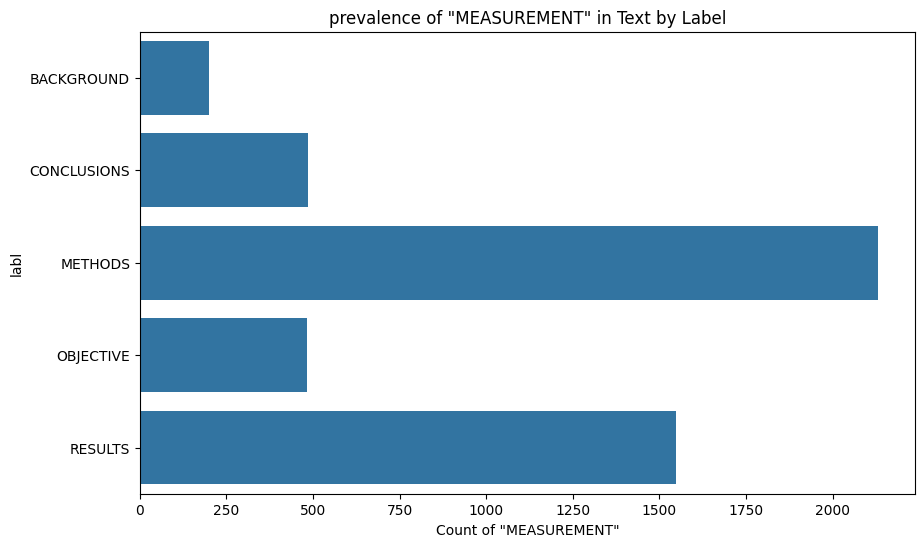

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Function to count occurrences of the word 'MEASUREMENT'
def count_measurement(text):
    return text.upper().count('MEASUREMENT')

# Apply the function to count 'MEASUREMENT' in each sentence
train['measurement_count'] = train['Text'].apply(count_measurement)
prevalence = train.groupby('Label')['measurement_count'].sum().reset_index()



plt.figure(figsize=(10, 6))
sns.barplot(data=prevalence, x='measurement_count', y='Label')
plt.title('prevalence of "MEASUREMENT" in Text by Label')
plt.xlabel('Count of "MEASUREMENT"')
plt.ylabel('labl')
plt.show()

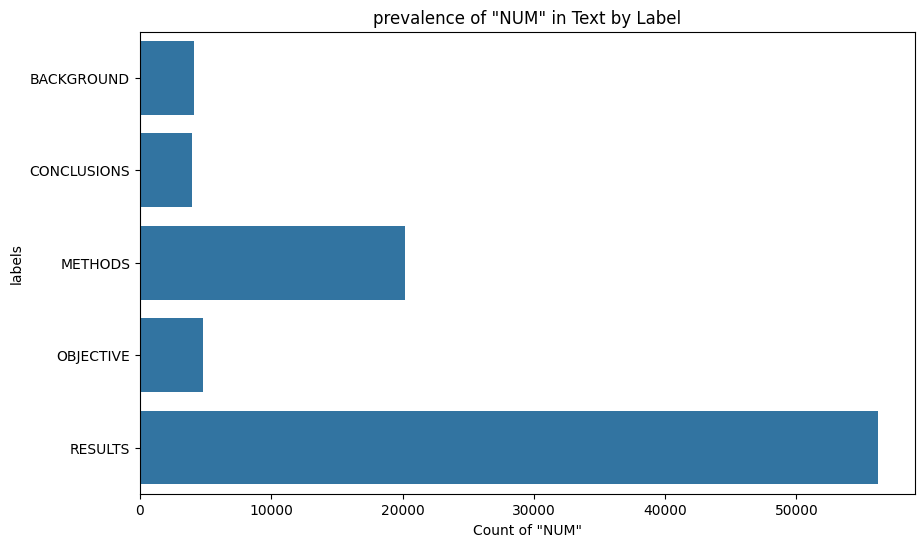

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Function to count occurrences of the word 'MEASUREMENT'
def count_num(text):
    return text.upper().count('NUM')

# Apply the function to count 'MEASUREMENT' in each sentence
train['num'] = train['Text'].apply(count_num)
prevalence = train.groupby('Label')['num'].sum().reset_index()


plt.figure(figsize=(10, 6))
sns.barplot(data=prevalence, x='num', y='Label')
plt.title('prevalence of "NUM" in Text by Label')
plt.xlabel('Count of "NUM"')
plt.ylabel('labels')
plt.show()

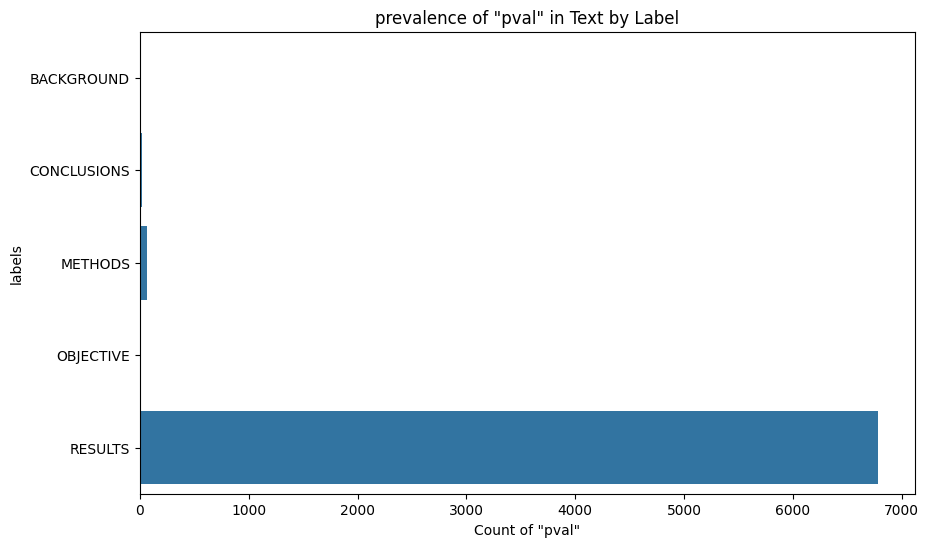

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Function to count occurrences of the word 'MEASUREMENT'
def count_pval(text):
    return text.upper().count('PVAL')

# Apply the function to count 'MEASUREMENT' in each sentence
train['pval'] = train['Text'].apply(count_pval)
prevalence = train.groupby('Label')['pval'].sum().reset_index()


plt.figure(figsize=(10, 6))
sns.barplot(data=prevalence, x='pval', y='Label')
plt.title('prevalence of "pval" in Text by Label')
plt.xlabel('Count of "pval"')
plt.ylabel('labels')
plt.show()

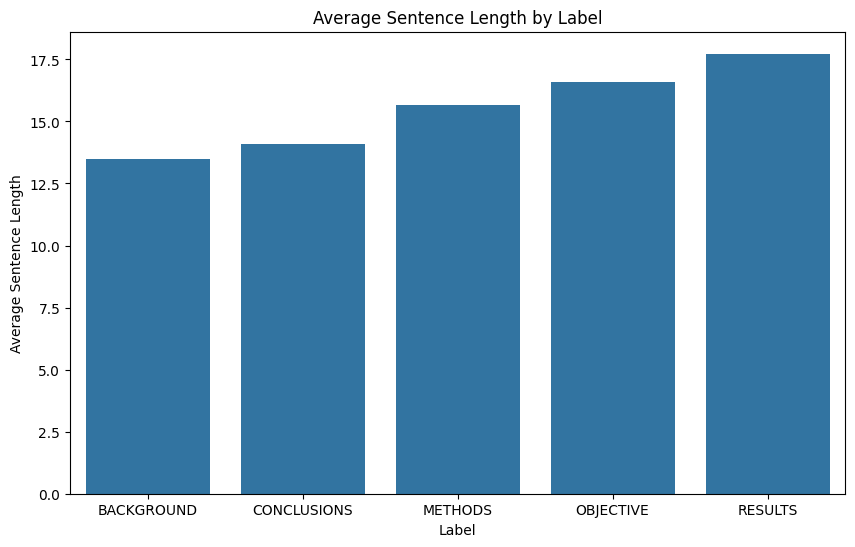

In [ ]:
# Function to compute the length of each sentence
def compute_sentence_length(text):
    return len(text.split())

# Apply the function to compute sentence length for each sentence
train['sentence_length'] = train['Text'].apply(compute_sentence_length)

# Calculate average sentence length for each label
avg_sentence_length = train.groupby('Label')['sentence_length'].mean().reset_index()

# Plot the average sentence length
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_sentence_length, x='Label', y='sentence_length')
plt.title('Average Sentence Length by Label')
plt.xlabel('Label')
plt.ylabel('Average Sentence Length')
plt.show()

The aforementioned custom tags we created are differentiating methods and results from other labels. However, we do not have tags that could improve classification of objective, background adn conclusion  labels. we therefore create word clouds for these labels to identify distinctive words.
We observe that word clouds across labels are similar, however, certain tokens set them apart. we can use them as custom tags

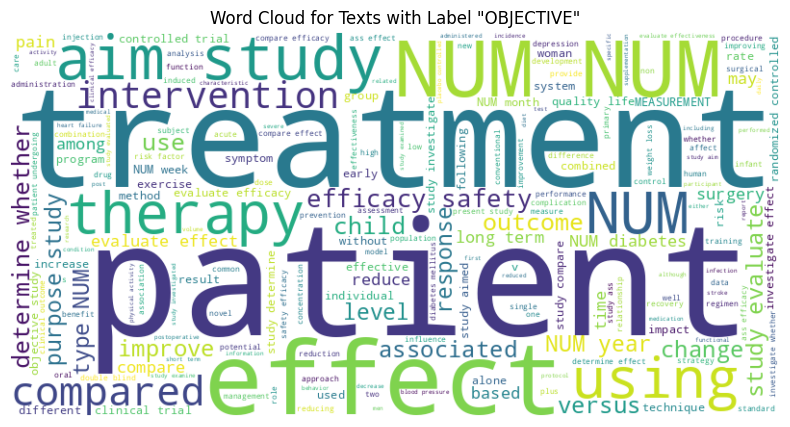

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

objective_texts = train[train['Label'] == 'OBJECTIVE']['Text']
objective_text_combined = " ".join(objective_texts)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(objective_text_combined)


plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Texts with Label "OBJECTIVE"')
plt.show()

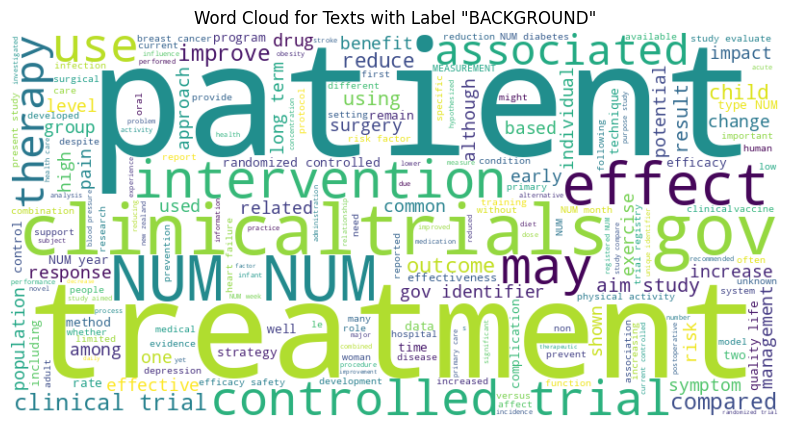

In [ ]:
objective_texts = train[train['Label'] == 'BACKGROUND']['Text']
objective_text_combined = " ".join(objective_texts)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(objective_text_combined)


plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Texts with Label "BACKGROUND"')
plt.show()

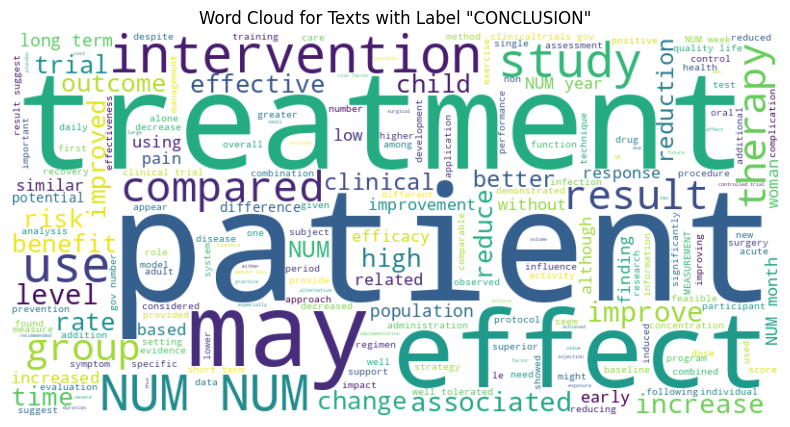

In [ ]:
objective_texts = train[train['Label'] == 'CONCLUSIONS']['Text']
objective_text_combined = " ".join(objective_texts)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(objective_text_combined)


plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Texts with Label "CONCLUSION"')
plt.show()

Based on the word cloud, I selected the word 'aim'


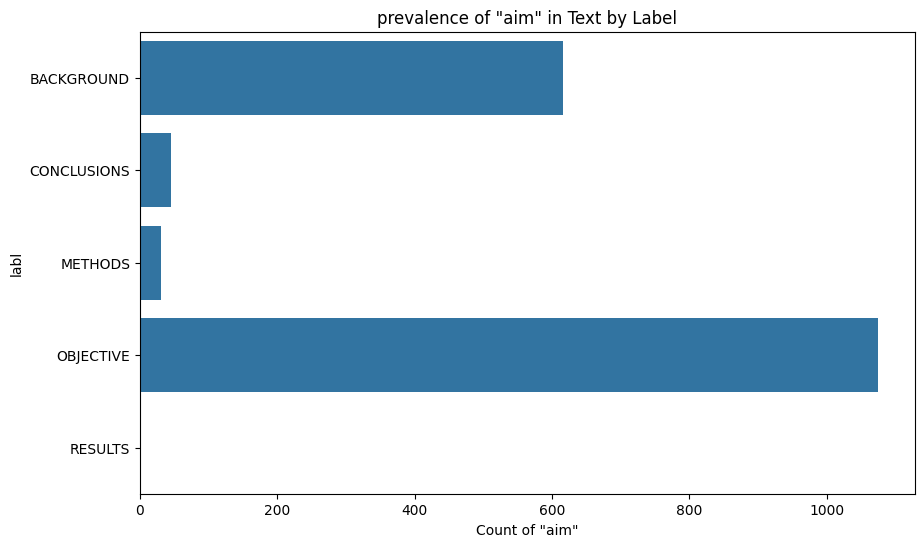

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
def count_aim_mentions(text):
    # Split the text into words and count 'aim'
    return text.split().count('aim')

# Apply the function to count 'MEASUREMENT' in each sentence
train['aim_count'] = train['Text'].apply(count_aim_mentions)
prevalence = train.groupby('Label')['aim_count'].sum().reset_index()



plt.figure(figsize=(10, 6))
sns.barplot(data=prevalence, x='aim_count', y='Label')
plt.title('prevalence of "aim" in Text by Label')
plt.xlabel('Count of "aim"')
plt.ylabel('labl')
plt.show()

In [ ]:
dev['measurement_count'] = dev['Text'].apply(count_measurement)
dev['num'] = dev['Text'].apply(count_num)
dev['sentence_length'] = dev['Text'].apply(compute_sentence_length)
dev['pval'] = dev['Text'].apply(count_pval)
dev['aim_count']=dev['Text'].apply(count_aim_mentions)

In [ ]:
test['measurement_count'] = test['Text'].apply(count_measurement)
test['num'] = test['Text'].apply(count_num)
test['sentence_length'] = test['Text'].apply(compute_sentence_length)
test['pval'] = test['Text'].apply(count_pval)
test['aim_count']=test['Text'].apply(count_aim_mentions)

# baseline models

our choice of representations: TfidfVectorizer and 2 embeddings: glove and distilBERT (due to limited computational resources)

In [ ]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer



In [ ]:
tfidf_vec = TfidfVectorizer()
tfidf_vec.fit(train['Text'])
first_fit_transformed_data=tfidf_vec.transform(train['Text'])

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

In [ ]:
try:
    from zeugma.embeddings import EmbeddingTransformer
except ImportError as e:
    !pip install zeugma
    !pip install theano
    from zeugma.embeddings import EmbeddingTransformer

from datetime import datetime
print(datetime.now())

  Preparing metadata (setup.py) ... done
  Created wheel for zeugma: filename=zeugma-0.49-py3-none-any.whl size=8790 sha256=ad1bbf6b56e239872c03db9e3b455ecfd0c015005cf07b92d94b72ee2872bbfe
  Stored in directory: /root/.cache/pip/wheels/33/55/16/3d9155ec34c3a4b3c5488ea8905fd994a6cafd68b8e3e26489
Successfully built zeugma
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 19.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for theano: filename=Theano-1.0.5-py3-none-any.whl size=2668109 sha256=c87afe763b14d93dc108eb618f434f9ccbd937d4fa065649a5317a95a83878d2
  Stored in directory: /root/.cache/pip/wheels/d9/e6/7d/2267d21a99e4ab8276f976f293b4ff23f50c9d809f4a216ebb
Successfully built theano
2024-07-03 18:06:20.744740


In [ ]:
from nltk.tokenize import word_tokenize

glove = EmbeddingTransformer('glove')


[==================================================] 100.0% 104.8/104.8MB downloaded


In [ ]:
def compute_sentence_embedding(sentence, glove_transformer):
    tokens = word_tokenize(sentence)  # Tokenize the sentence into words
    embeddings = []

    for token in tokens:
        try:
            embedding = glove_transformer.transform([token])[0]  # Get GloVe embedding for the token
            embeddings.append(embedding)
        except KeyError:
            # Handle unknown tokens (tokens not in GloVe vocabulary)
            embeddings.append(np.zeros_like(glove_transformer.transform(['the'])[0]))  # Use zero vector for unknown tokens

    if embeddings:
        sentence_embedding = np.mean(embeddings, axis=0)  # Average embeddings of all tokens
    else:
        sentence_embedding = np.zeros_like(glove_transformer.transform(['the'])[0])  # Default to zero vector if no tokens found

    return sentence_embedding


In [ ]:
sentences = train['Text']  # Assuming train['Text'] contains your sentences

glove_sentence_embeddings = []
for sentence in sentences:
    sentence_embedding = compute_sentence_embedding(sentence, glove)
    glove_sentence_embeddings.append(sentence_embedding)

# Convert list of arrays to a numpy array
glove_sentence_embeddings = np.array(glove_sentence_embeddings)


In [ ]:
sentences_dev = dev['Text']  # Assuming train['Text'] contains your sentences

glove_sentence_embeddings_dev = []
for sentence in sentences_dev:
    sentence_embedding = compute_sentence_embedding(sentence, glove)
    glove_sentence_embeddings_dev.append(sentence_embedding)

# Convert list of arrays to a numpy array
glove_sentence_embeddings_dev = np.array(glove_sentence_embeddings_dev)


In [ ]:
glove_sentence_embeddings

array([[-0.41208348,  0.39243624, -0.60074323, ..., -0.37783512,
        -0.01838874, -0.59150225],
       [-0.13368887,  0.2875686 , -0.2646535 , ...,  0.09812099,
        -0.20284374, -0.60732186],
       [-0.29383796,  0.49432778, -1.2042055 , ..., -0.26160157,
        -0.00460087, -0.34598008],
       ...,
       [-0.19956541,  0.34356472, -0.56338555, ..., -0.16743153,
        -0.27218953, -0.28654045],
       [ 0.12478072,  0.20793296, -0.3339773 , ..., -0.25060198,
        -0.25946254, -0.41942447],
       [-0.32567614,  0.19833648, -0.49720743, ..., -0.1315036 ,
        -0.03428269, -0.33236557]], dtype=float32)

In [ ]:
import seaborn as sns
from sklearn.metrics import pairwise

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text  # Imports TF ops for preprocessing.

have downgraded tf to one of its older versions since was encountering an error with the latest version

In [ ]:
tf.__version__

'2.11.1'

In [ ]:
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
#bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

distilbert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1")


In [ ]:
import numpy as np
import time

def get_bert_embeddings(texts, preprocess_layer, encoder_layer, batch_size=32):
    all_embeddings = []
    num_batches = int(np.ceil(len(texts)/batch_size))

    for i in range(num_batches):
        batch_texts = texts[i * batch_size:(i + 1) * batch_size]
        inputs = preprocess_layer(tf.constant(batch_texts))
        start_time = time.time()
        outputs = encoder_layer(inputs)
        cls_embeddings = outputs['pooled_output'].numpy()
        all_embeddings.append(cls_embeddings)
        batch_time = time.time() - start_time
        print('batch num:', i, round(batch_time), 'sec')

    return np.concatenate(all_embeddings, axis=0)


texts = train['Text'].tolist()[:5000]
train_embeddings_bert = get_bert_embeddings(texts, bert_preprocess, distilbert_encoder, batch_size=32)


2 sec
3 sec
4 sec
2 sec
2 sec
2 sec
2 sec
4 sec
3 sec
2 sec
2 sec
2 sec
3 sec
4 sec
2 sec
2 sec
2 sec
2 sec
4 sec
2 sec
2 sec
2 sec
2 sec
3 sec
3 sec
2 sec
2 sec
2 sec
2 sec
4 sec
2 sec
2 sec
2 sec
2 sec
3 sec
3 sec
2 sec
2 sec
2 sec
3 sec
4 sec
2 sec
2 sec
2 sec
2 sec
3 sec
3 sec
2 sec
2 sec
2 sec
3 sec
4 sec
2 sec
2 sec
2 sec
2 sec
4 sec
3 sec
2 sec
2 sec
2 sec
3 sec
4 sec
2 sec
2 sec
2 sec
2 sec
4 sec
3 sec
2 sec
2 sec
2 sec
3 sec
4 sec
2 sec
2 sec
2 sec
2 sec
4 sec
2 sec
2 sec
2 sec
2 sec
4 sec
3 sec
2 sec
2 sec
2 sec
3 sec
4 sec
2 sec
3 sec
3 sec
3 sec
4 sec
3 sec
2 sec
2 sec
2 sec
3 sec
3 sec
2 sec
2 sec
2 sec
3 sec
4 sec
2 sec
2 sec
2 sec
2 sec
4 sec
3 sec
2 sec
2 sec
2 sec
3 sec
4 sec
2 sec
2 sec
2 sec
3 sec
4 sec
3 sec
2 sec
2 sec
2 sec
4 sec
3 sec
2 sec
2 sec
2 sec
3 sec
4 sec
2 sec
2 sec
2 sec
2 sec
4 sec
3 sec
2 sec
2 sec
2 sec
3 sec
4 sec
2 sec
2 sec
2 sec
3 sec
4 sec
3 sec
2 sec
2 sec
2 sec
3 sec
3 sec
2 sec
1 sec


In [ ]:
#saving it to local system so that dont need to keep running a pre-trained BERT model to extract embeddings for a given set of texts
np.save('train_embeddings_bert.npy', train_embeddings_bert)


Note: this code runs. However, it takes quite long. I downloaded the pre-trained BERT model on my local system and imported it here.

In [ ]:
import numpy as np
import time

def get_bert_embeddings(texts, preprocess_layer, encoder_layer, batch_size=100):
    all_embeddings = []
    num_batches = int(np.ceil(len(texts)/batch_size))

    for i in range(num_batches):
        batch_texts = texts[i * batch_size:(i + 1) * batch_size]
        inputs = preprocess_layer(tf.constant(batch_texts))
        start_time = time.time()
        outputs = encoder_layer(inputs)
        cls_embeddings = outputs['pooled_output'].numpy()
        all_embeddings.append(cls_embeddings)
        batch_time = time.time() - start_time
        print('batch num:', i, round(batch_time), 'sec')

    return np.concatenate(all_embeddings, axis=0)


texts = train['Text'].tolist()
train_embeddings_bert_10k= get_bert_embeddings(texts, bert_preprocess, distilbert_encoder, batch_size=100)

batch num: 0 7 sec
batch num: 1 5 sec
batch num: 2 6 sec
batch num: 3 5 sec
batch num: 4 7 sec


KeyboardInterrupt: 

In [ ]:
np.save('train_embeddings_bert_10k.npy', train_embeddings_bert_10k)


Goal is to experiment with different amounts of data. Will increasing training on data improve BERT's performance on our ML models?

In [ ]:
import numpy as np
import time

def get_bert_embeddings(texts, preprocess_layer, encoder_layer, batch_size=100):
    all_embeddings = []
    num_batches = int(np.ceil(len(texts)/batch_size))

    for i in range(num_batches):
        batch_texts = texts[i * batch_size:(i + 1) * batch_size]
        inputs = preprocess_layer(tf.constant(batch_texts))
        start_time = time.time()
        outputs = encoder_layer(inputs)
        cls_embeddings = outputs['pooled_output'].numpy()
        all_embeddings.append(cls_embeddings)
        batch_time = time.time() - start_time
        print('batch num:', i, round(batch_time), 'sec')

    return np.concatenate(all_embeddings, axis=0)


texts = train['Text'].tolist()[:2000]
train_embeddings_bert_2000 = get_bert_embeddings(texts, bert_preprocess, distilbert_encoder, batch_size=100)

batch num: 0 9 sec
batch num: 1 10 sec
batch num: 2 8 sec
batch num: 3 10 sec
batch num: 4 8 sec
batch num: 5 9 sec
batch num: 6 10 sec
batch num: 7 8 sec
batch num: 8 9 sec
batch num: 9 8 sec
batch num: 10 9 sec
batch num: 11 9 sec
batch num: 12 8 sec
batch num: 13 10 sec
batch num: 14 8 sec
batch num: 15 10 sec
batch num: 16 9 sec
batch num: 17 8 sec
batch num: 18 10 sec
batch num: 19 8 sec


In [ ]:
import numpy as np

Here, I experimented with the vectorisations, embeddings and model specific hyperparameters like number of estimators for RF and even amount of data BERT was trained on. However, we do not notice any improvements in classification accuracy for RF. This lack of improvement could be due to inherent limitations in the model's ability to capture the nuances of the data.

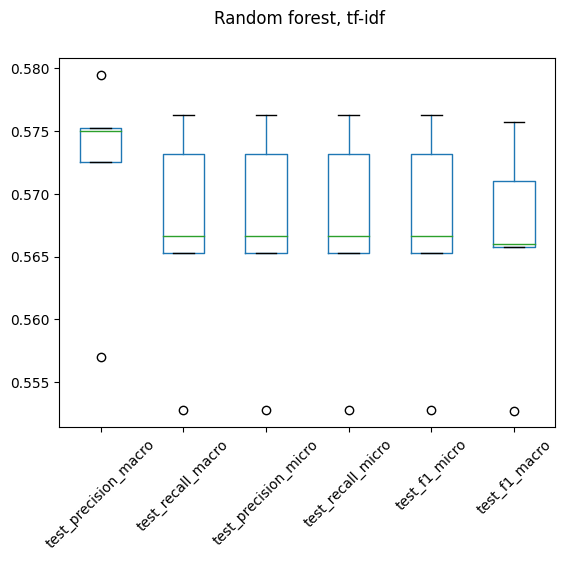

In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=0).fit(first_fit_transformed_data, train['Label'])
scoring = ['precision_macro', 'recall_macro','precision_micro','recall_micro', 'f1_micro', 'f1_macro']
scores = cross_validate(rf_classifier, first_fit_transformed_data, train['Label'], scoring=scoring, cv=5, return_train_score=False)
scoresdf = pd.DataFrame(scores)
scoring = ['test_precision_macro', 'test_recall_macro','test_precision_micro','test_recall_micro', 'test_f1_micro', 'test_f1_macro']
bp = scoresdf.boxplot(column=scoring, grid=False, rot=45,)
[ax_tmp.set_xlabel('') for ax_tmp in np.asarray(bp).reshape(-1)]
fig = np.asarray(bp).reshape(-1)[0].get_figure()
fig.suptitle('Random forest, tf-idf')
plt.show()

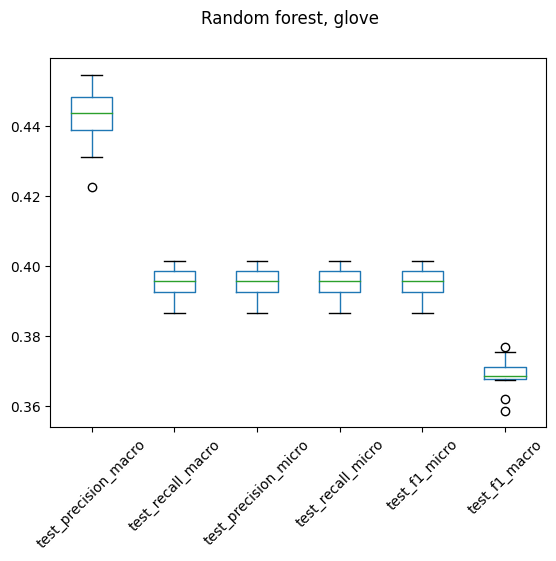

In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=300, max_depth=3, random_state=0).fit(glove_sentence_embeddings, train['Label'])
scoring = ['precision_macro', 'recall_macro','precision_micro','recall_micro', 'f1_micro', 'f1_macro']
scores = cross_validate(rf_classifier, glove_sentence_embeddings, train['Label'], scoring=scoring, cv=10, return_train_score=False)
scoresdf = pd.DataFrame(scores)
scoring = ['test_precision_macro', 'test_recall_macro','test_precision_micro','test_recall_micro', 'test_f1_micro', 'test_f1_macro']
bp = scoresdf.boxplot(column=scoring, grid=False, rot=45,)
[ax_tmp.set_xlabel('') for ax_tmp in np.asarray(bp).reshape(-1)]
fig = np.asarray(bp).reshape(-1)[0].get_figure()
fig.suptitle('Random forest, glove')
plt.show()

In [ ]:
train_embeddings_bert=np.load('/content/train_embeddings_bert.npy')

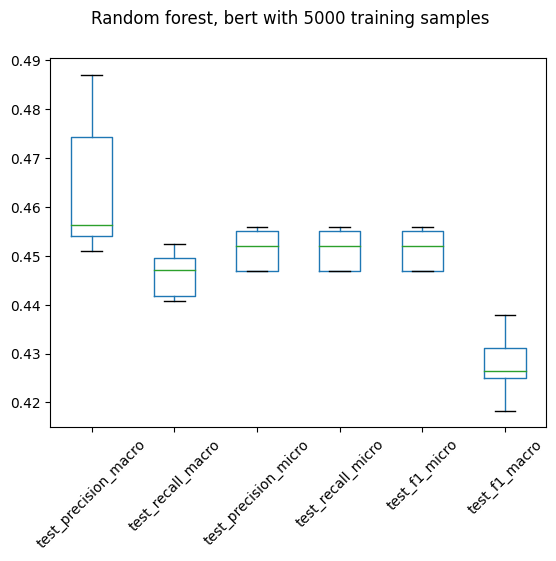

In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=0).fit(train_embeddings_bert, train['Label'][:5000])
scoring = ['precision_macro', 'recall_macro','precision_micro','recall_micro', 'f1_micro', 'f1_macro']
scores = cross_validate(rf_classifier, train_embeddings_bert, train['Label'][:5000], scoring=scoring, cv=5, return_train_score=False)
scoresdf = pd.DataFrame(scores)
scoring = ['test_precision_macro', 'test_recall_macro','test_precision_micro','test_recall_micro', 'test_f1_micro', 'test_f1_macro']
bp = scoresdf.boxplot(column=scoring, grid=False, rot=45,)
[ax_tmp.set_xlabel('') for ax_tmp in np.asarray(bp).reshape(-1)]
fig = np.asarray(bp).reshape(-1)[0].get_figure()
fig.suptitle('Random forest, bert with 5000 training samples')
plt.show()

In [ ]:
train_embeddings_bert_10k=np.load('/content/train_embeddings_bert_10k.npy')

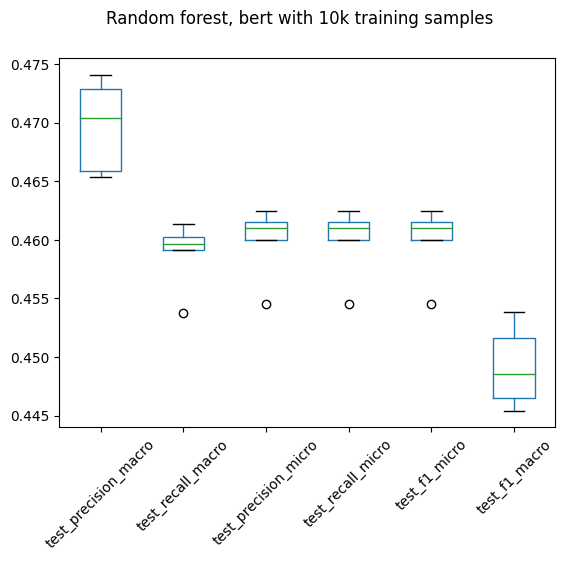

In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=0).fit(train_embeddings_bert_10k, train['Label'][:10000])
scoring = ['precision_macro', 'recall_macro','precision_micro','recall_micro', 'f1_micro', 'f1_macro']
scores = cross_validate(rf_classifier, train_embeddings_bert_10k, train['Label'][:10000], scoring=scoring, cv=5, return_train_score=False)
scoresdf = pd.DataFrame(scores)
scoring = ['test_precision_macro', 'test_recall_macro','test_precision_micro','test_recall_micro', 'test_f1_micro', 'test_f1_macro']
bp = scoresdf.boxplot(column=scoring, grid=False, rot=45,)
[ax_tmp.set_xlabel('') for ax_tmp in np.asarray(bp).reshape(-1)]
fig = np.asarray(bp).reshape(-1)[0].get_figure()
fig.suptitle('Random forest, bert with 10k training samples')
plt.show()

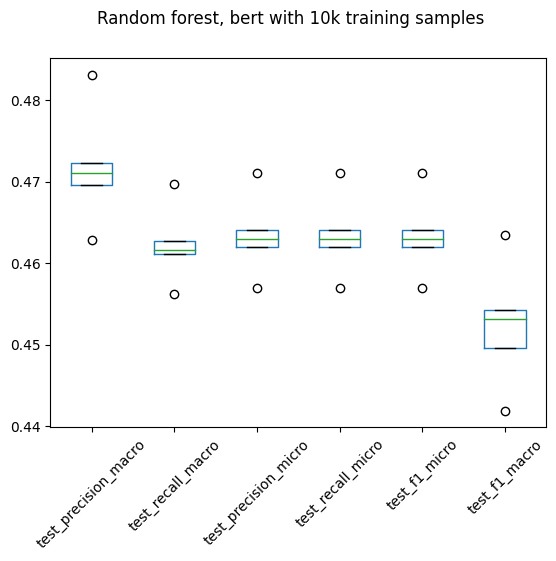

In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=300, max_depth=3, random_state=0).fit(train_embeddings_bert_10k, train['Label'][:10000])
scoring = ['precision_macro', 'recall_macro','precision_micro','recall_micro', 'f1_micro', 'f1_macro']
scores = cross_validate(rf_classifier, train_embeddings_bert_10k, train['Label'][:10000], scoring=scoring, cv=5, return_train_score=False)
scoresdf = pd.DataFrame(scores)
scoring = ['test_precision_macro', 'test_recall_macro','test_precision_micro','test_recall_micro', 'test_f1_micro', 'test_f1_macro']
bp = scoresdf.boxplot(column=scoring, grid=False, rot=45,)
[ax_tmp.set_xlabel('') for ax_tmp in np.asarray(bp).reshape(-1)]
fig = np.asarray(bp).reshape(-1)[0].get_figure()
fig.suptitle('Random forest, bert with 10k training samples')
plt.show()

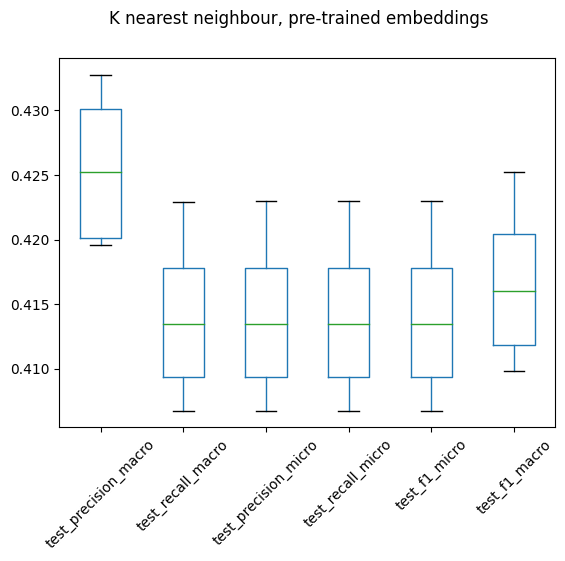

In [ ]:
kneighbour_classifier = KNeighborsClassifier().fit(glove_transformed_training_data, train['Label'])
scoring = ['precision_macro', 'recall_macro','precision_micro','recall_micro', 'f1_micro', 'f1_macro']
scores = cross_validate(kneighbour_classifier, glove_transformed_training_data, train['Label'], scoring=scoring, cv=10, return_train_score=False)
scoresdf = pd.DataFrame(scores)
scoring = ['test_precision_macro', 'test_recall_macro','test_precision_micro','test_recall_micro', 'test_f1_micro', 'test_f1_macro']
bp = scoresdf.boxplot(column=scoring, grid=False, rot=45,)
[ax_tmp.set_xlabel('') for ax_tmp in np.asarray(bp).reshape(-1)]
fig = np.asarray(bp).reshape(-1)[0].get_figure()
fig.suptitle('K nearest neighbour, pre-trained embeddings')
plt.show()

#CRF

In [ ]:
!pip install sklearn_crfsuite

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 16.6 MB/s eta 0:00:00


In [ ]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
train=train.sort_values(by=['id', 'order'])
grouped_train = train.groupby('id')
dev=dev.sort_values(by=['id', 'order'])
grouped_dev = dev.groupby('id')
test=test.sort_values(by=['id', 'order'])
grouped_test = test.groupby('id')

I stuck with window size of 2 as past research indicates both optimality in terms of run time and performance metric (Dernoncourt, 2017).

In [ ]:
#using window size of 2
def word2features(sent, i):
    word = sent.iloc[i]['Text']
    features = {
        #'bias': 1.0,
        'word': word,
       'sentence_length': sent.iloc[i]['sentence_length'],
       'order': sent.iloc[i]['order'],
       'measurement_count': sent.iloc[i]['measurement_count'],
      'aim': sent.iloc[i]['aim_count'],
       'num': sent.iloc[i]['num'],
       'pval': sent.iloc[i]['pval'],
    }

    #embedding=glove[i]
    #for j, value in enumerate(embedding):
    #  features[f'embedding_{j}']=value

    if i > 0:
        #embedding=glove[i-1]
        #for j, value1 in enumerate(embedding):
        #  features[f'-1embedding_{j}']=value1

        word1 = sent.iloc[i-1]['Text']
        features.update({
            '-1:word': word1,
        })
        if i>1:
          word2=sent.iloc[i-2]['Text']
          features.update({
            '-1:word': word1,
            '-2:word': word2,
        })
    else:
        features['BOS'] = True  # Beginning of sentence

    if i < len(sent)-1:
        word1 = sent.iloc[i+1]['Text']
        features.update({
            '+1:word': word1,

        })
        if i<len(sent)-2:
          word2=sent.iloc[i+2]['Text']
          features.update({
            '+1:word': word1,
            '+2:word': word2,
        })

    else:
        features['EOS'] = True  # End of sentence




    return features

def extract_features(doc):
    return [word2features(doc, i) for i in range(len(doc))]

def get_labels(doc):
    return list(doc['Label'])

In [ ]:
docs = [group for _, group in grouped_train]
sentences = [extract_features(doc) for doc in docs]
labels = [get_labels(doc) for doc in docs]


In [ ]:
docs_dev = [group for _, group in grouped_dev]
sentences_dev = [extract_features(doc) for doc in docs_dev]
labels_dev = [get_labels(doc) for doc in docs_dev]

In [ ]:
docs_test = [group for _, group in grouped_test]
sentences_test = [extract_features(doc) for doc in docs_test]
labels_test = [get_labels(doc) for doc in docs_test]

In [ ]:
from sklearn_crfsuite import CRF


crf = CRF(
    algorithm='lbfgs',
    c1=0.1,
    c2=0.1,
    max_iterations=100,
    all_possible_transitions=False
)
try:
  crf.fit(sentences, labels)
except AttributeError:
  pass

In [ ]:
crf_dev_predictions= crf.predict(sentences_dev)
crf_dev_actual_labels = [label for doc in labels_dev for label in doc]
crf_dev_predictions = [label for doc in crf_dev_predictions for label in doc]

In [ ]:
from sklearn_crfsuite import metrics
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(crf_dev_actual_labels, crf_dev_predictions))


              precision    recall  f1-score   support

  BACKGROUND       0.42      0.25      0.31      2376
 CONCLUSIONS       0.73      0.86      0.79      2376
     METHODS       0.63      0.70      0.66      2376
   OBJECTIVE       0.56      0.71      0.62      2376
     RESULTS       0.78      0.66      0.72      2376

    accuracy                           0.64     11880
   macro avg       0.62      0.64      0.62     11880
weighted avg       0.62      0.64      0.62     11880



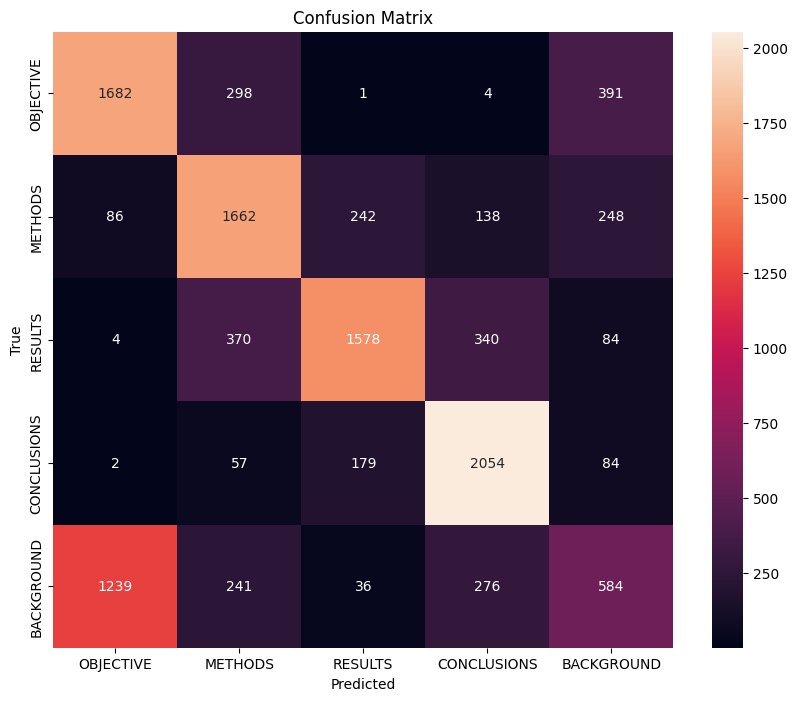

In [ ]:
# Plot the confusion matrix
conf_matrix_dev = confusion_matrix(crf_dev_actual_labels, crf_dev_predictions, labels=crf.classes_)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_dev, annot=True, fmt='d', xticklabels=crf.classes_, yticklabels=crf.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
crf_test_predictions= crf.predict(sentences_test)
crf_test_actual_labels = [label for doc in labels_test for label in doc]
crf_test_predictions = [label for doc in crf_test_predictions for label in doc]

In [ ]:
print(classification_report(crf_test_actual_labels, crf_test_predictions))

              precision    recall  f1-score   support

  BACKGROUND       0.41      0.24      0.31      2333
 CONCLUSIONS       0.72      0.89      0.79      2333
     METHODS       0.62      0.65      0.64      2333
   OBJECTIVE       0.55      0.69      0.61      2333
     RESULTS       0.78      0.66      0.71      2333

    accuracy                           0.63     11665
   macro avg       0.61      0.63      0.61     11665
weighted avg       0.61      0.63      0.61     11665



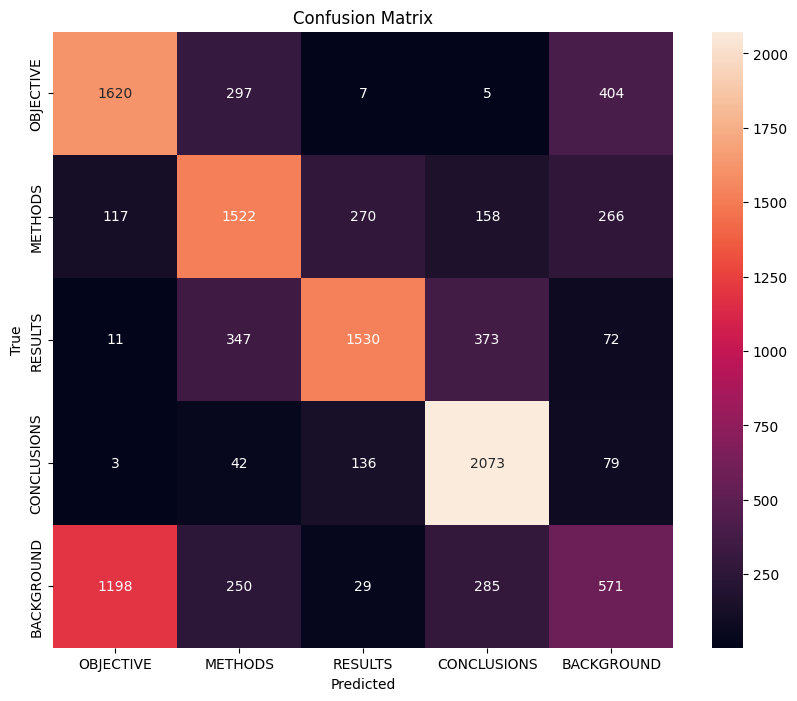

In [ ]:
# Plot the confusion matrix
conf_matrix_test = confusion_matrix(crf_test_actual_labels, crf_test_predictions, labels=crf.classes_)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', xticklabels=crf.classes_, yticklabels=crf.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
crf_train_predictions= crf.predict(sentences)
crf_train_actual_labels = [label for doc in labels for label in doc]
crf_train_predictions = [label for doc in crf_train_predictions for label in doc]

In [ ]:
print(confusion_matrix(crf_train_actual_labels, crf_train_predictions))

[[13719    88     3    14    15]
 [    3 13816     2     5    13]
 [   51    20 13745    17     6]
 [   39     2     1 13796     1]
 [   25    14     5     0 13795]]


In [ ]:
import numpy as np
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse=False)
crf_dev_predictions= np.array(crf_dev_predictions).reshape(-1,1)
crf_one_hot_dev = one_hot_encoder.fit_transform(crf_dev_predictions)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
crf_test_predictions= np.array(crf_test_predictions).reshape(-1,1)
crf_one_hot_test = one_hot_encoder.fit_transform(crf_test_predictions)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
import numpy as np

def vocab(data):
  vocab=[]
  for i in data:
    words=i.split(" ")
    for x in words:
      vocab.append(x.lower())
  return set(vocab)

max_vocab_length=len(vocab((dev['Text'])))
max_length=int(np.percentile(dev["sentence_length"],95))
text_vectorizer=tf.keras.layers.TextVectorization(max_tokens=max_vocab_length,output_sequence_length=max_length)
text_vectorizer.adapt(dev['Text'])
embedding=tf.keras.layers.Embedding(input_dim=len(text_vectorizer.get_vocabulary()),output_dim=128,mask_zero=True)

y_dev=dev['Label']
y_test=test['Label']
y_tr= train["Label"]

le=LabelEncoder()
le.fit(y_tr)
y_tr=le.transform(y_tr)
le.fit(y_dev)
y_dev=le.transform(y_dev)
le.fit(y_test)
y_test=le.transform(y_test)

y_tr=tf.keras.utils.to_categorical(y_tr,num_classes=5)
y_dev=tf.keras.utils.to_categorical(y_dev,num_classes=5)
y_test=tf.keras.utils.to_categorical(y_test,num_classes=5)

I trained the CNN model on CRF predictions on the validation dataset. Using the training dataset again would have led the CNN model to depend almost entirely on the CRF predictions (since CRF was trained on it), resulting in little to no training on the embeddings. Our aim was to improve the generalisability of our model

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Dropout, GlobalAveragePooling1D, Dense, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.layers import TextVectorization, Embedding
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

#early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)


# Define the CNN Model
inputs = Input(shape=[], dtype="string", name="input_layer")
x = text_vectorizer(inputs)
x = embedding(x)

# Initial CNN layers. added dropouts and regularisers to prevent overfitting, something i noticed while experimenting with this architecture.
x = Conv1D(32, 5, activation='relu',kernel_regularizer=l2(0.01))(x)
x = MaxPooling1D()(x)
x = Dropout(0.4)(x)
x = GlobalAveragePooling1D()(x)

# CRF predictions input
crf_inputs = Input(shape=(5,), name="crf_input")

# Concatenate embeddings with CRF predictions after GlobalAveragePooling1D
x = Concatenate(axis=-1)([x, crf_inputs])
x = Dense(64, activation='relu')(x)     # Fully connected layer to add complexity
#x = Dropout(0.1)(x)

output = Dense(5, activation="softmax", name="output")(x)

modelCNN = Model(inputs=[inputs, crf_inputs], outputs=output, name="modelCNN")
modelCNN.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


# Train the model

historycnn=modelCNN.fit([dev['Text'][:8000], crf_one_hot_dev[:8000]],y_dev[:8000],epochs=10, validation_data=([dev['Text'][8000:], crf_one_hot_dev[8000:]],y_dev[8000:]), callbacks=[early_stopping])


# Evaluate the model
modelCNN.evaluate([dev['Text'][8000:], crf_one_hot_dev[8000:]],y_dev[8000:])

Epoch 1/10
250/250 [==============================] - 10s 35ms/step - loss: 1.1636 - accuracy: 0.6150 - val_loss: 0.8890 - val_accuracy: 0.6461
Epoch 2/10
250/250 [==============================] - 8s 30ms/step - loss: 0.8165 - accuracy: 0.6672 - val_loss: 0.8118 - val_accuracy: 0.6747
Epoch 3/10
250/250 [==============================] - 9s 35ms/step - loss: 0.6822 - accuracy: 0.7414 - val_loss: 0.7941 - val_accuracy: 0.6905
Epoch 4/10
250/250 [==============================] - 7s 29ms/step - loss: 0.5552 - accuracy: 0.8123 - val_loss: 0.8549 - val_accuracy: 0.6892
Epoch 5/10
250/250 [==============================] - 9s 36ms/step - loss: 0.4561 - accuracy: 0.8510 - val_loss: 0.9027 - val_accuracy: 0.6840
Epoch 6/10
122/122 [==============================] - 1s 6ms/step - loss: 0.7941 - accuracy: 0.6905


[0.7940844893455505, 0.6904639005661011]

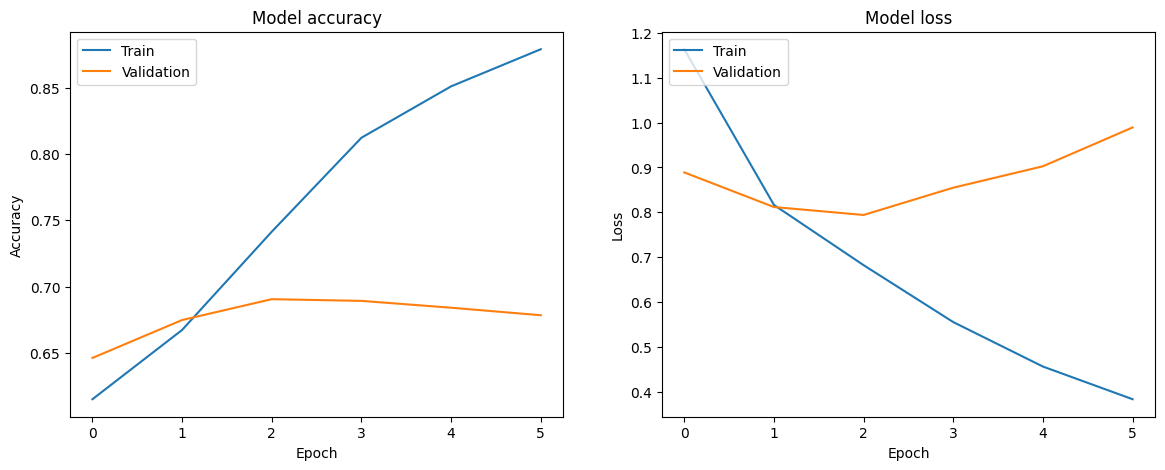

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(historycnn.history['accuracy'])
plt.plot(historycnn.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(historycnn.history['loss'])
plt.plot(historycnn.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


In [ ]:
# Generate predictions
predictions = modelCNN.predict([test['Text'], crf_one_hot_test])

predicted_labels = np.argmax(predictions, axis=1) # Get predicted class indices
true_labels = np.argmax(y_test, axis=1) # Get true class indices from one-hot encoded y_test
target_names = ['BACKGROUND', 'METHODS', 'OBJECTIVE', 'RESULTS', 'CONCLUSIONS']

print(classification_report(true_labels, predicted_labels, target_names=target_names))


modelCNN.evaluate([test['Text'], crf_one_hot_test],y_test)

365/365 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

  BACKGROUND       0.56      0.45      0.50      2333
     METHODS       0.76      0.88      0.82      2333
   OBJECTIVE       0.67      0.73      0.70      2333
     RESULTS       0.60      0.62      0.61      2333
 CONCLUSIONS       0.77      0.72      0.74      2333

    accuracy                           0.68     11665
   macro avg       0.67      0.68      0.67     11665
weighted avg       0.67      0.68      0.67     11665

365/365 [==============================] - 1s 3ms/step - loss: 0.8329 - accuracy: 0.6784


[0.8329347372055054, 0.678354024887085]

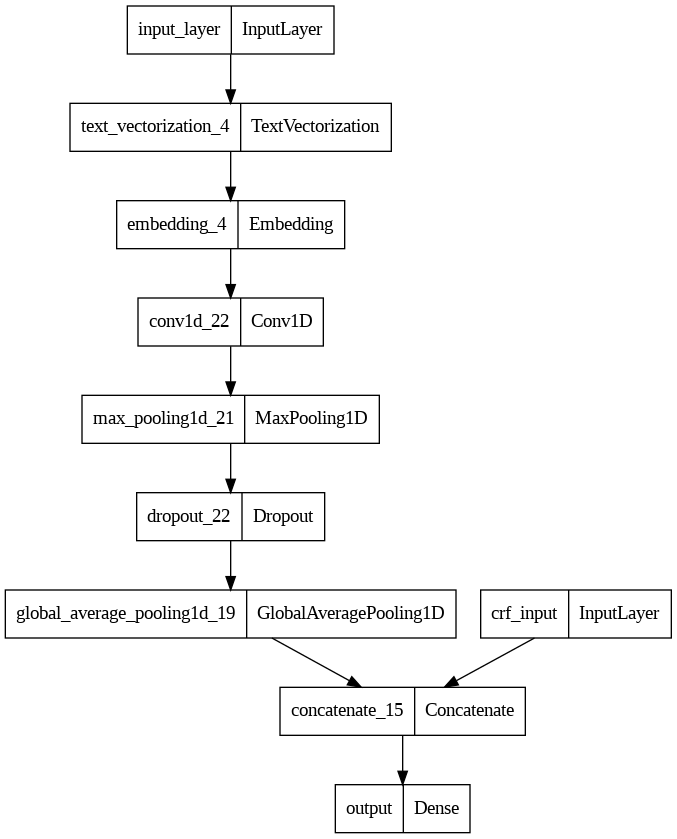

In [ ]:
tf.keras.utils.plot_model(modelCNN)


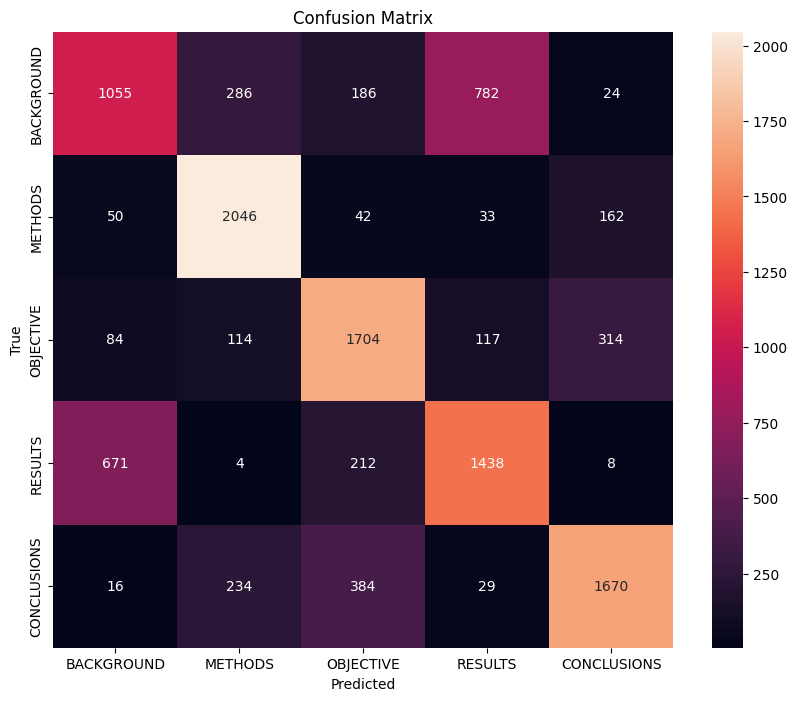

In [ ]:
# Plot the confusion matrix
conf_matrix_test = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()